In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp as exp
from MODS.IDnumbers import IDnumbers
%matplotlib inline

In [5]:
# Plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

In [6]:
# Set-up Plotly
tls.set_credentials_file(username="jclasul", api_key="MKXHNoKq9cRqNshsRQlh")
tls.set_config_file(sharing="public")

# Set-up IDnumbers
WriteIO = IDnumbers()

In [7]:
HR = pd.read_csv("HRIN.csv")

# Drop useless variables
# find way to automate without looking at plots
HR.drop(["EmployeeCount","Over18","StandardHours"], axis = 1, inplace=True)

# 35 variables for 1470 persons before drops
HR.shape

(1470, 32)

In [8]:
# List all variables and data types
HR.dtypes.value_counts()

int64     24
object     8
dtype: int64

In [9]:
# Dealing with CATEGORICAL variables
# # # # # # # # # # # #
# Method 1:
# One-Hot encoding
# # # # # # # # # # # #

recast = pd.get_dummies(HR, sparse=True, drop_first=True)
recast_corr = pd.DataFrame.dropna(recast.corr(), axis=[0,1],how="all")

# # # # # # # # # # # #
# Method 2:
# Label Encoding
# # # # # # # # # # # #
#
# Convert all Object dtypes to Categorical

def TO_CAT(col):
    if col.dtype == "object":
        return col.astype("category").cat.codes
    else:
        return col
    
encoding = HR.apply(TO_CAT, axis=0)
encoding_corr = pd.DataFrame.dropna(encoding.corr(), axis=[0,1],how="all")

In [10]:
# Plotly CONTOUR map
# 
# values have to be in LIST for PLOTLY, convert tolist and use COLUMN names for axis
# 

py.iplot([go.Contour(z=recast_corr.values.tolist(),
                   x=recast_corr.columns.tolist(),
                   y=recast_corr.columns.tolist())])

In [11]:
# Plotly CONTOUR map
# 
# values have to be in LIST for PLOTLY, convert tolist and use COLUMN names for axis
# 

py.iplot([go.Contour(z=encoding_corr.values.tolist(),
                   x=encoding_corr.columns.tolist(),
                   y=encoding_corr.columns.tolist())])

In [12]:
# Plotting Function
# Using Encoded labels
#
# To Add: Category names !!
#
def GET_CAT(COLUMN):
    CCDict = {}
    if HR[COLUMN].dtype == 'O': 
        CCats = HR[COLUMN].astype("category").cat.categories.tolist()
        for i,CCat in enumerate(CCats):
            CCDictUpdate = {CCat: i}
            CCDict.update(CCDictUpdate)
        return CCDict
            

def MakeGraph(DATA,INPUT,RESPONSE="Attrition"):
    for VARIABLE in INPUT:
        if VARIABLE == RESPONSE:
            continue
            
        sns.set_style("whitegrid")
        sns.set_palette("muted")
        plt.figure(figsize=(12,5))
        plt.suptitle("{:s} and {:s} graphs".format(VARIABLE,RESPONSE), fontsize="x-large")

        p1 = plt.subplot(2,2,2)
        sns.boxplot(y=DATA[RESPONSE], x=DATA[VARIABLE], orient="h")
        plt.legend()

        p2 = plt.subplot(2,2,4, sharex=p1)
        if RESPONSE == "Attrition":
            sns.distplot(DATA.loc[DATA[RESPONSE] == 0][VARIABLE], label="Stayed")
            sns.distplot(DATA.loc[DATA[RESPONSE] == 1][VARIABLE], label="Left")               
        plt.ylabel("Probability Density")
        plt.legend()

        p3 = plt.subplot(1,2,1)
        sns.pointplot(x=DATA[RESPONSE],y=DATA[VARIABLE], capsize = 0.2)
        plt.show()
        print(GET_CAT(VARIABLE))       

In [13]:
DATA = encoding
INPUT = pd.DataFrame.select_dtypes(DATA, exclude=["object"]).columns
RESPONSE = "Attrition"

No handles with labels found to put in legend.


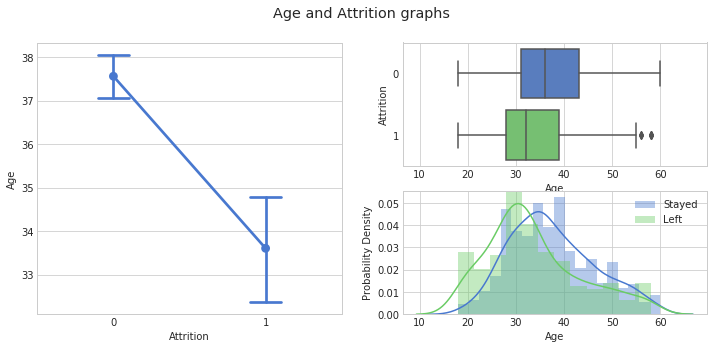

None


No handles with labels found to put in legend.


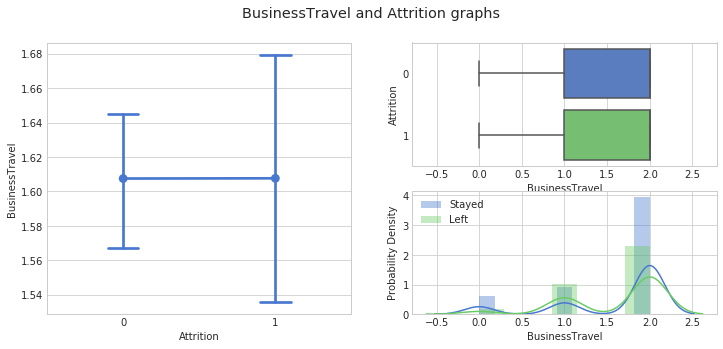

No handles with labels found to put in legend.


{'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}


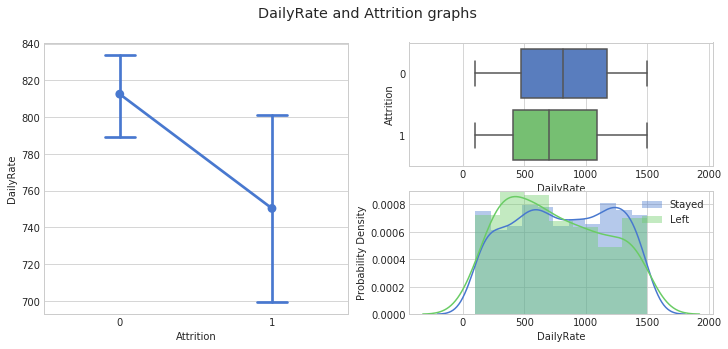

No handles with labels found to put in legend.


None


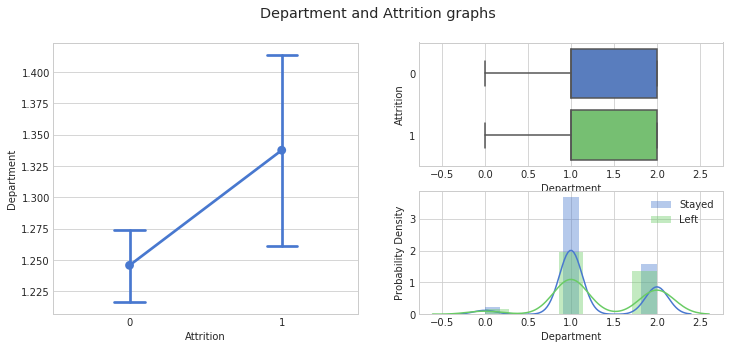

No handles with labels found to put in legend.


{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}


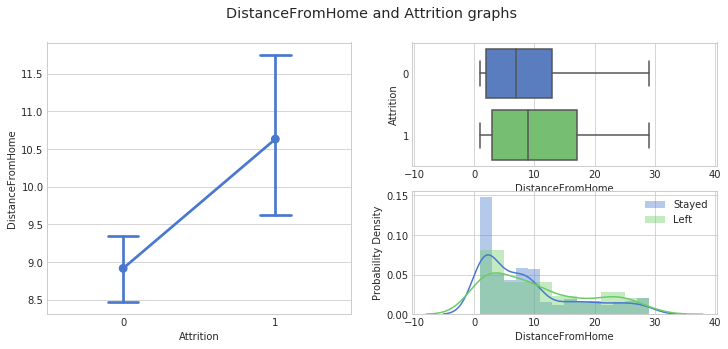

No handles with labels found to put in legend.


None


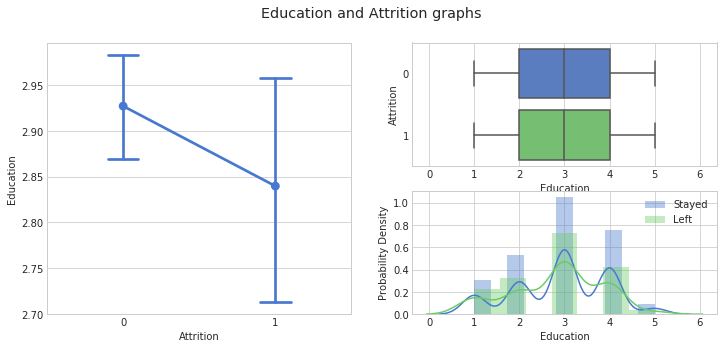

No handles with labels found to put in legend.


None


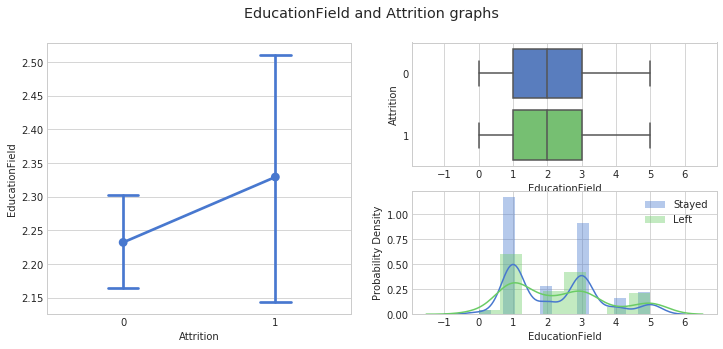

No handles with labels found to put in legend.


{'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}


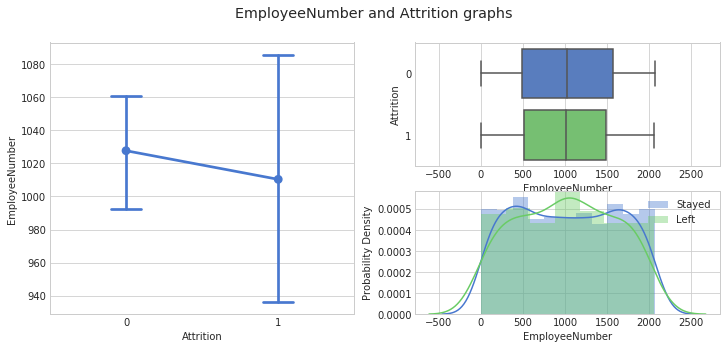

No handles with labels found to put in legend.


None


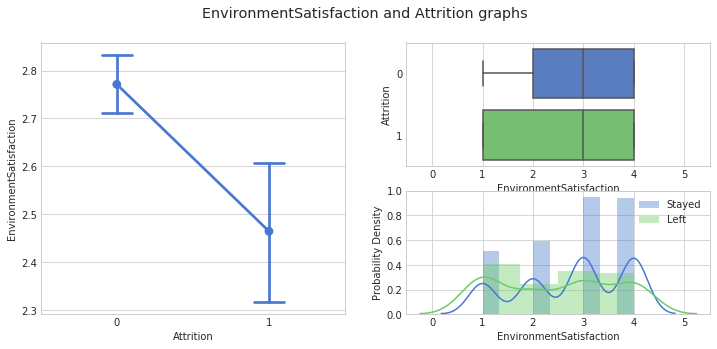

No handles with labels found to put in legend.


None


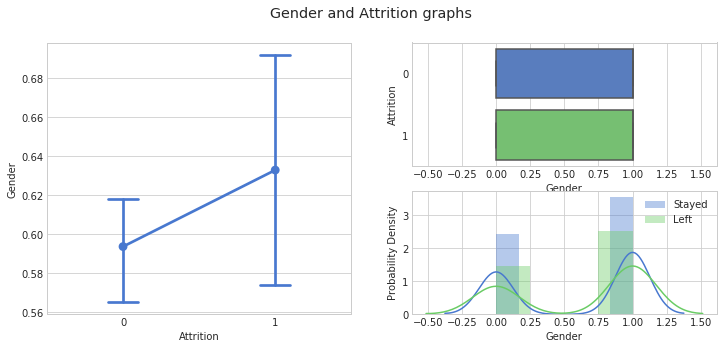

No handles with labels found to put in legend.


{'Female': 0, 'Male': 1}


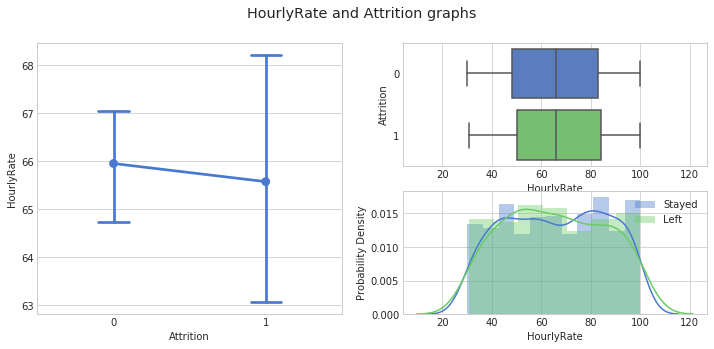

No handles with labels found to put in legend.


None


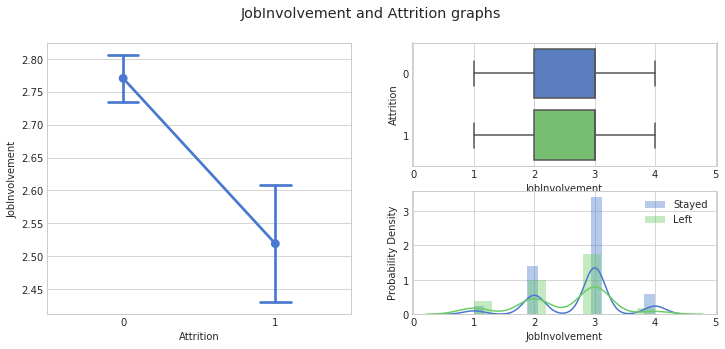

No handles with labels found to put in legend.


None


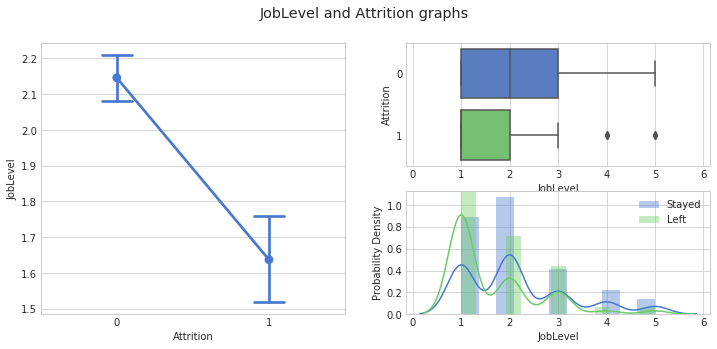

No handles with labels found to put in legend.


None


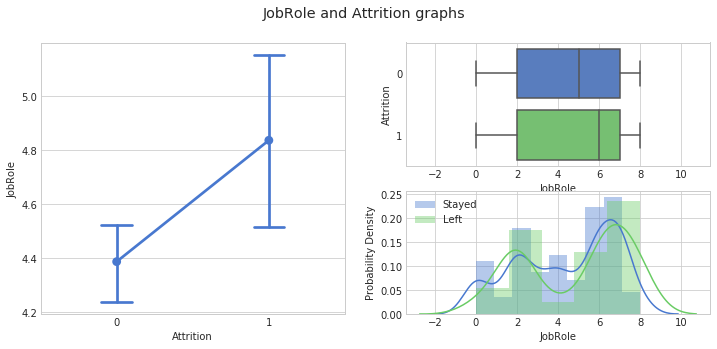

No handles with labels found to put in legend.


{'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}


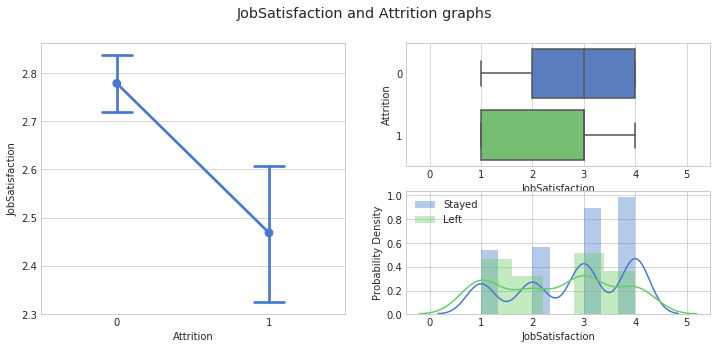

No handles with labels found to put in legend.


None


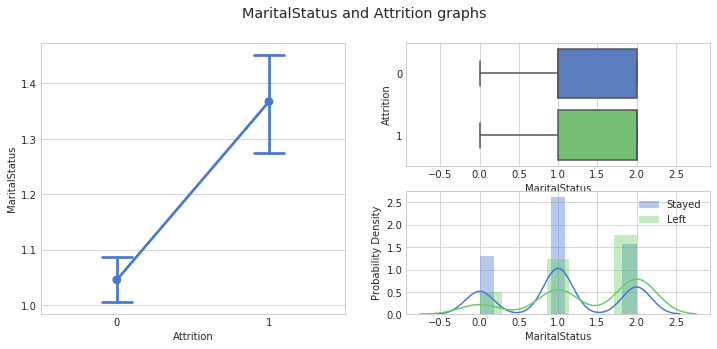

No handles with labels found to put in legend.


{'Divorced': 0, 'Married': 1, 'Single': 2}


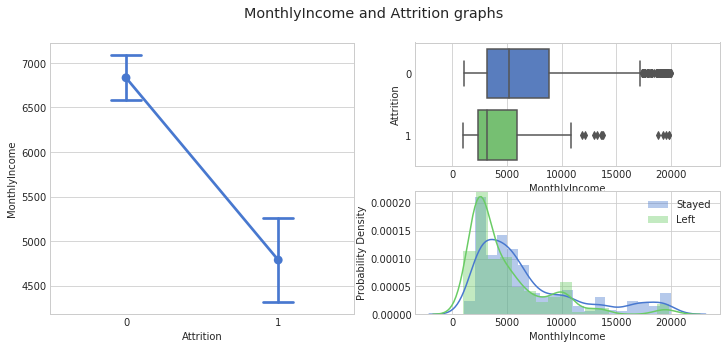

No handles with labels found to put in legend.


None


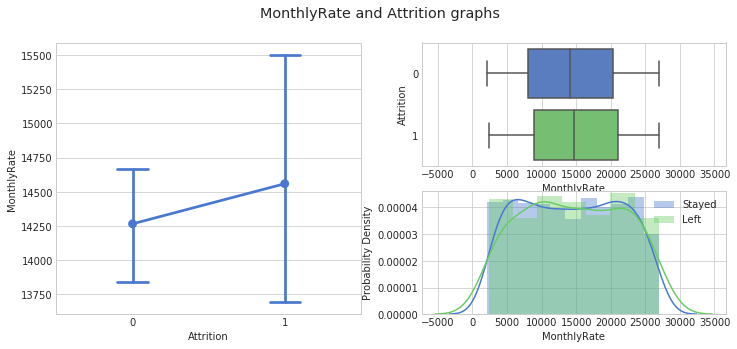

No handles with labels found to put in legend.


None


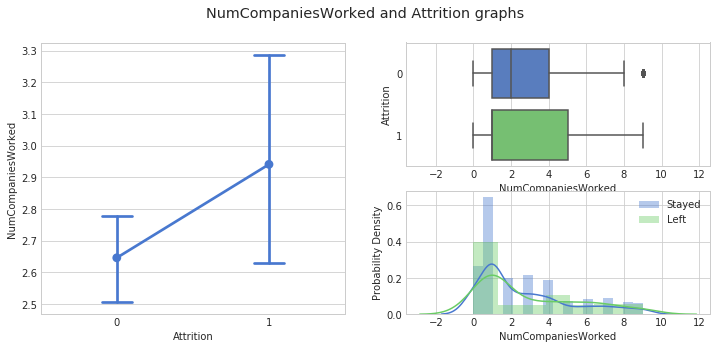

No handles with labels found to put in legend.


None


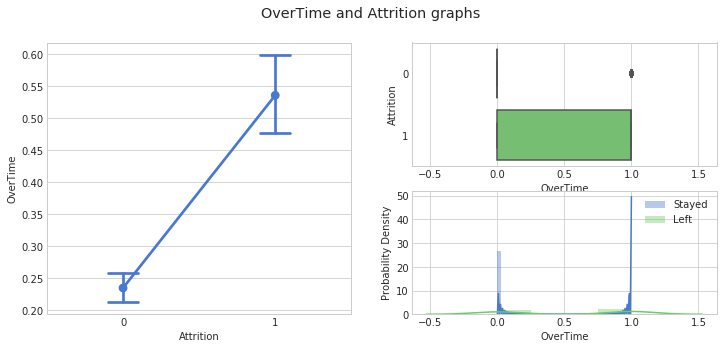

No handles with labels found to put in legend.


{'No': 0, 'Yes': 1}


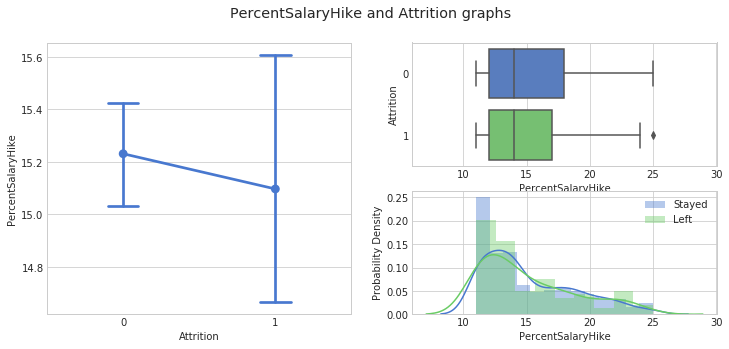

No handles with labels found to put in legend.


None


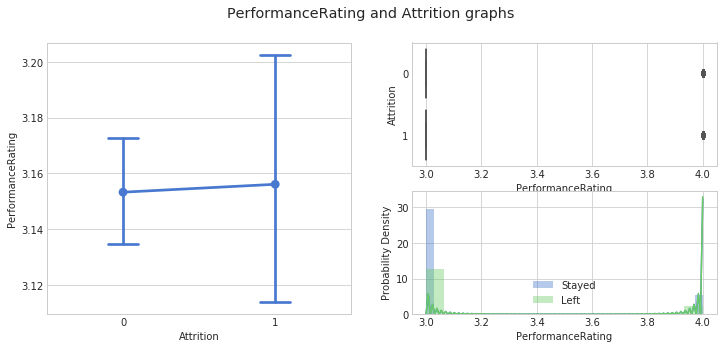

No handles with labels found to put in legend.


None


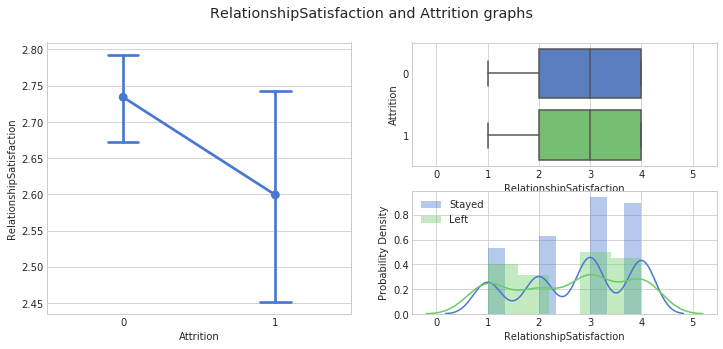

No handles with labels found to put in legend.


None


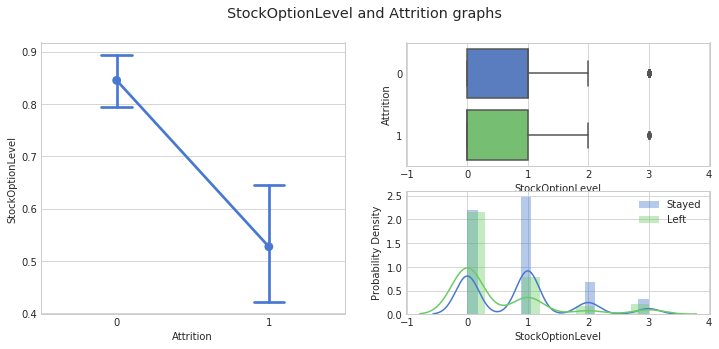

No handles with labels found to put in legend.


None


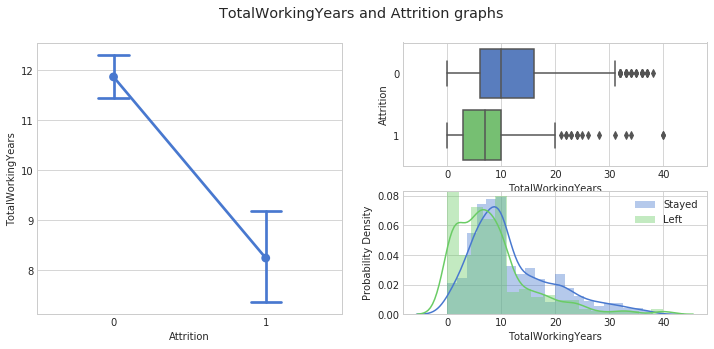

No handles with labels found to put in legend.


None


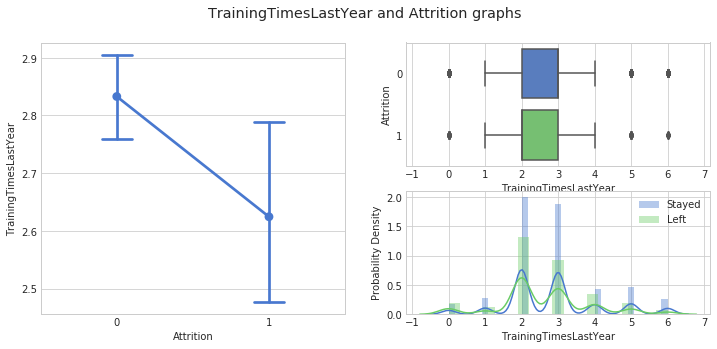

No handles with labels found to put in legend.


None


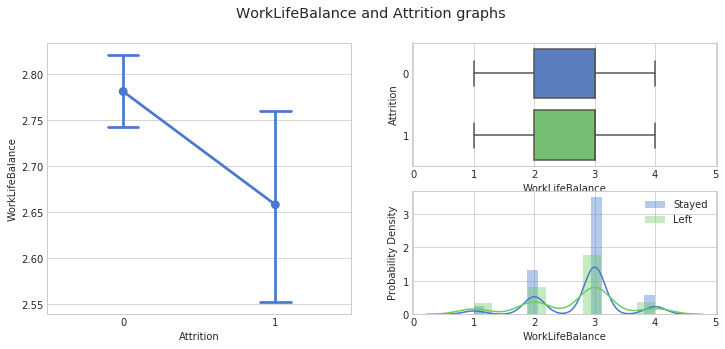

No handles with labels found to put in legend.


None


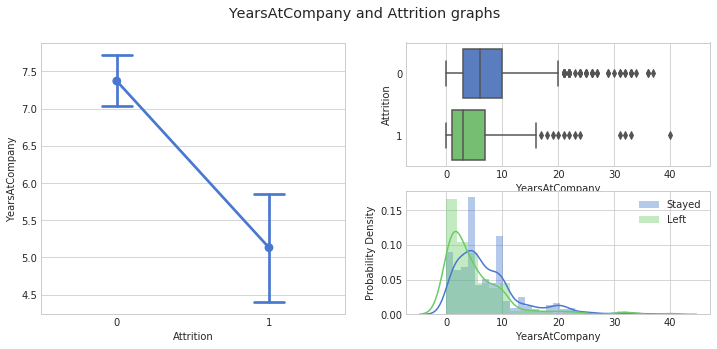

No handles with labels found to put in legend.


None


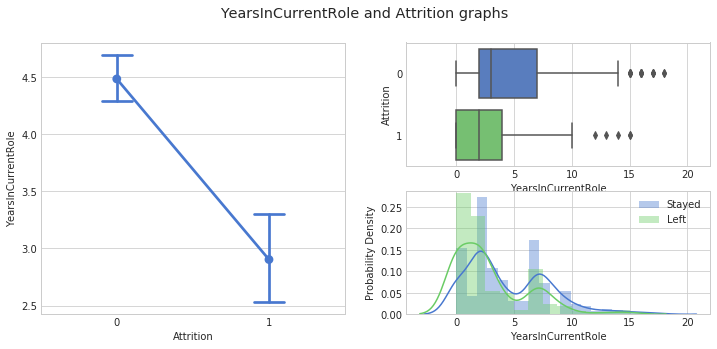

No handles with labels found to put in legend.


None


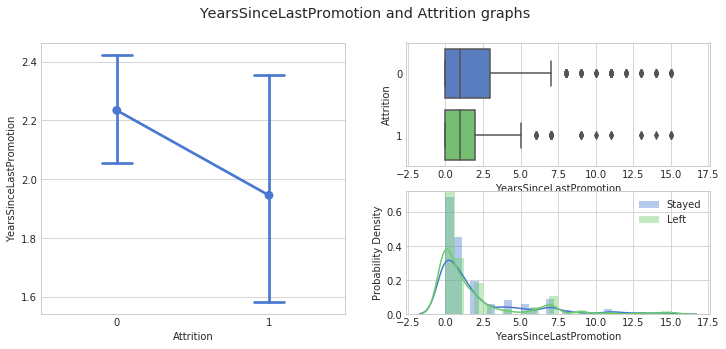

No handles with labels found to put in legend.


None


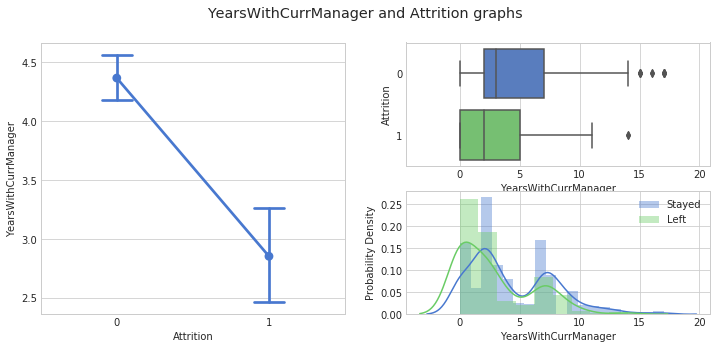

None


In [14]:
# CREATE graphs
#

MakeGraph(DATA,INPUT,RESPONSE)

In [15]:
# START machine learning
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree

# something
# something else
# finish

In [16]:
# Functions::
#
def SPLIT_DATA(DATA=encoding, RAND=True, Testsize=0.3):
    x_train, x_test, y_train, y_test = train_test_split(DATA.drop("Attrition",axis=1), 
                                                        DATA["Attrition"], test_size = Testsize)
    
    if RAND == True:
        list_of_random_items = GET_RANDOM(DATA=x_train)
        #x_train.drop(list_of_random_items, axis = 1, inplace= True)

        [DataSet.drop(list_of_random_items, axis = 1, inplace = True) for DataSet in [x_train,x_test]]
    
    return x_train, x_test, y_train, y_test

# RANDOM variable selection
def GET_RANDOM(DATA):
    group_of_items = set(DATA.columns)
    num_to_select = np.random.randint(1,len(group_of_items))
    list_of_random_items = random.sample(group_of_items, num_to_select)
    
    return list_of_random_items

# TO:DO
# IMPROVE only MODEL initiation changes, reduce code
#

def TRAIN_MODEL_LOG(RAND=True, Testsize=0.3):
    # SPLIT Data, using CALL SPLIT_DATA function
    # To include ALL variables select RAND = False
    # Testsize default = 0.3
    x_train, x_test, y_train, y_test = SPLIT_DATA(RAND=RAND, Testsize=Testsize)
    
    # USE LogisticRegression from SKLEARN
    model = LogisticRegression()    
    # FIT the model with training input
    model.fit(x_train,y_train)  
    
    # PREDICT using LRM with test data set
    PREDICTIONS = model.predict(x_test)
    
    # evaluate predictions 
    accuracy = accuracy_score(y_test,PREDICTIONS)
    # CALL ConfMatrix function
    ConfMatrix, INCORRECT_T1, INCORRECT_T2 = CONF_MATRIX(y_test, PREDICTIONS)
    
    # 
    #OUTLIST = [accuracy, INCORRECT_T1, INCORRECT_T2, len(x_train.columns), x_train.columns.tolist(), ConfMatrix.flatten()]    
    OUTLIST = x_train, x_test, y_train, y_test, accuracy, model.coef_, model.intercept_, PREDICTIONS, model
    return OUTLIST   

## END TO:DO

def CONF_MATRIX(y_test, PREDICTIONS):
    # CREATE confusion matrix and get TI TII errors
    ConfMatrix = confusion_matrix(y_test, PREDICTIONS)
    # CALL TI TII function
    INCORRECT_T1,INCORRECT_T2 = TITII(DATA = ConfMatrix)
    
    return ConfMatrix, INCORRECT_T1, INCORRECT_T2

def TITII(DATA):
    CORRECT_TRUE = DATA[-1,-1]/DATA[-1,:].sum()
    INCORRECT_T2 = 1-CORRECT_TRUE
    CORRECT_FALSE = DATA[0,0]/DATA[0,:].sum()
    INCORRECT_T1 = 1-CORRECT_FALSE
    
    return INCORRECT_T1,INCORRECT_T2  

# Change colour palette
def MAKE_HM(MODEL_NAME, ConfMatrix = None, y_test = None, PREDICTIONS = None, Score="Not Given"):
    plt.figure(figsize=(5,5))
    if ConfMatrix is None:
        ConfMatrix, INCORRECT_T1, INCORRECT_T2 = CONF_MATRIX(y_test,PREDICTIONS)
    else:
        ConfMatrix = ConfMatrix.reshape(2,2)
        INCORRECT_T1,INCORRECT_T2 = TITII(ConfMatrix)
    
    sns.heatmap(ConfMatrix, annot=True, fmt=".3f", linewidths=1, square=True, cmap="icefire", cbar=False) 
    
    # LABELS & TITLES
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    plt.suptitle("The Score for the {} is : {}, Type II : {}".format(MODEL_NAME,Score,INCORRECT_T2))
    plt.show()    

In [18]:
# RUN Models n-times
# TO:DO find run-time for each function call and optimize
# WriteIO operations probabely take long

ModelResults = []
for i in range(0,1000):    
#     ModelResults.append(TRAIN_MODEL_LOG())
    if i % 250 == 0:
        print(i)
    
    # Store on local drive in case of crashes
    #WriteIO.GetFile(Mode="a", WriteString = TRAIN_MODEL_LOG(), FileName="IDnumbers_LRM_T1")
    #WriteIO.GetFile(Mode="a", WriteString = TRAIN_MODEL_XGBoost_1(), FileName="IDnumbers_XGB_T1")
    
#ModelResults[4] = ModelResults[3].str.len()

0
250
500
750


In [19]:
# READ in modelling results
# PLOT accuracy scores, TII errors and NVars

def MODEL_EVAL(MODEL_NAME):
    SCORES = []
    with open(MODEL_NAME) as f:
        for line in f:
            line_data = [line for line in line.split(",")]
            SCORE = [float(scores.strip("[]").strip("'")) for scores in line_data[0:4]]
            SCORES.append(SCORE)  

    SCORES = pd.DataFrame(SCORES)
    SCORES.rename(columns={0:"Score", 1:"Error1",2:"Error2",3:"NVars"}, inplace=True)

    # GRAPH
    plt.figure(figsize=(5,5))

    SCORES.groupby("NVars")[["Score","Error2"]].median().plot()
    plt.suptitle("Median Score and Error2 for {}".format(MODEL_NAME))
    plt.show()

    print("Total runs : {}".format(len(SCORES.Score)))

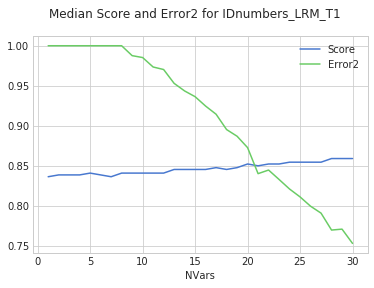

Total runs : 10341


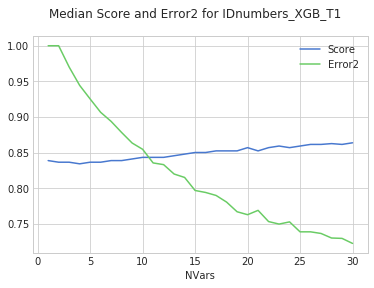

Total runs : 10612


In [20]:
MODEL_EVAL("IDnumbers_LRM_T1")
MODEL_EVAL("IDnumbers_XGB_T1")

In [24]:
# Plot Decision tree
# Very large, hard to "interpret"

from sklearn.datasets import load_iris
from sklearn import tree

x_train, x_test, y_train, y_test = SPLIT_DATA(RAND=False)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [25]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [28]:
# shuffle and split training and test sets
x_train, x_test, y_train, y_test = SPLIT_DATA()

In [29]:
# USE LogisticRegression from SKLEARN
model = LogisticRegression()    
# FIT the model with training input
y_score = model.fit(x_train,y_train).decision_function(x_test)

In [30]:
# USE LogisticRegression from SKLEARN
model = LogisticRegression()    
# FIT the model with training input
model.fit(x_train,y_train)
y_score = model.fit(x_train,y_train).decision_function(x_test)

# PREDICT using LRM with test data set
PREDICTIONS = model.predict(x_test)

# evaluate predictions 
accuracy = accuracy_score(y_test,PREDICTIONS)
# CALL ConfMatrix function
ConfMatrix, INCORRECT_T1, INCORRECT_T2 = CONF_MATRIX(y_test, PREDICTIONS)

In [31]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
i = "Vals"
fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
roc_auc[i] = auc(fpr[i], tpr[i])

In [32]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

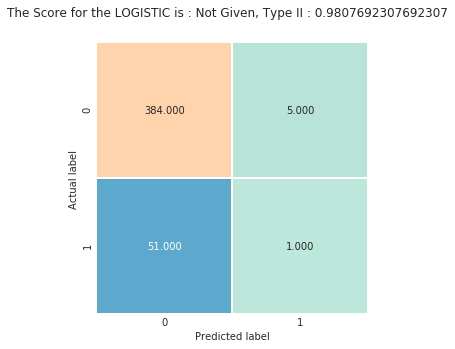

In [33]:
MAKE_HM("LOGISTIC", ConfMatrix=ConfMatrix)

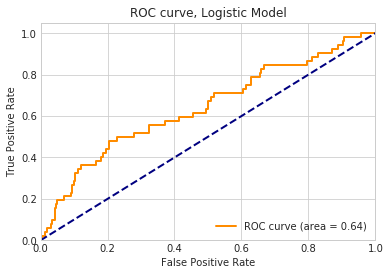

In [34]:
plt.figure()
lw = 2
i = "Vals"
plt.plot(fpr[i], tpr[i], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, Logistic Model')
plt.legend(loc="lower right")
plt.show()

In [35]:
def GETPREDICT(DATA, COEF, INTERCEPT):
    OUT = np.sum(COEF * DATA, axis = 1)
    return OUT + INTERCEPT[0]

def CONFSCORE(x_train, y_train, model, i):
    TRAIN_X = x_train.loc[i]
    TRAIN_Y = y_train.loc[i]
    PREDICT_X = model.predict(x_train.loc[i].values.reshape(1,-1))[0]
    
    NameCoeff = TRAIN_X * model.coef_.T[:,0]
    OUT = pd.DataFrame(data=dict(VALUES=TRAIN_X,COEF = model.coef_.T[:,0], VALUES_COEF=NameCoeff))
    
    print(OUT.sort_values("VALUES_COEF", ascending = False), "\n")
    
    print("Prediction : {} \t Actual : {} \t Confidence Score : {}".format(PREDICT_X, TRAIN_Y, vals[i]))
    print("LOG Proba  : {} \t Proba  : {} \n\n".format(model.predict_log_proba(x_train.loc[i].values.reshape(1,-1)),model.predict_proba(x_train.loc[i].values.reshape(1,-1))))

Number of values '> 0': 0 
 number of columns 8 

Top Picks : 
 Series([], dtype: float64)


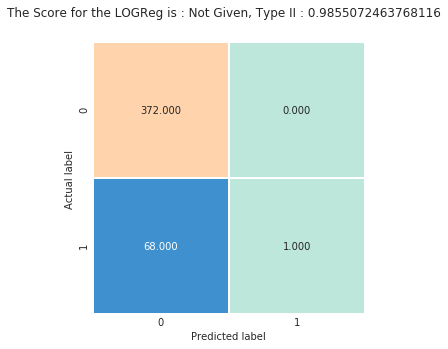

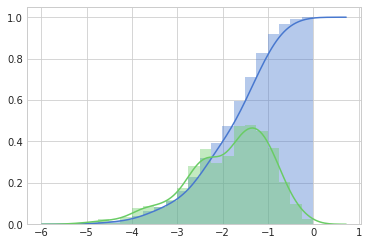

In [36]:
x_train, x_test, y_train, y_test, accuracy, coef, intercept, PREDICTIONS, model = TRAIN_MODEL_LOG()

DATA = x_train
COEF = coef
INTERCEPT = intercept

vals = GETPREDICT(DATA,COEF, INTERCEPT)
TOPvals = vals[vals > 0].sort_values(ascending = False)
MINvals = vals[vals < 0].sort_values()
print("Number of values '> 0': {} \n number of columns {} \n".format(len(vals[vals > 0]), len(x_train.columns)))
print("Top Picks : \n {}".format(TOPvals[0:5]))
MAKE_HM("LOGReg", y_test=y_test, PREDICTIONS=PREDICTIONS)

sns.distplot(vals.sort_values().values, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
sns.distplot(vals.sort_values().values)

In [37]:
print("TOP \n")
for i in TOPvals[0:2].index:
    CONFSCORE(x_train, y_train, model, i)

print("MID \n")
for i in MINvals.iloc[-102:-100].index:
    CONFSCORE(x_train, y_train, model, i) 
 
print("BOT \n")
for i in MINvals[0:2].index:
    CONFSCORE(x_train, y_train, model, i)

TOP 

MID 

                        COEF  VALUES  VALUES_COEF
JobRole             0.070635       8     0.565084
HourlyRate         -0.000132      43    -0.005668
Gender             -0.012094       1    -0.012094
MonthlyIncome      -0.000029    2678    -0.078896
TotalWorkingYears  -0.040663       2    -0.081327
YearsInCurrentRole -0.155127       1    -0.155127
DailyRate          -0.000425     654    -0.278270
JobInvolvement     -0.187228       4    -0.748914 

Prediction : 0 	 Actual : 0 	 Confidence Score : -0.809868747779652
LOG Proba  : [[-0.36805151 -1.17792025]] 	 Proba  : [[0.69208153 0.30791847]] 


                        COEF  VALUES  VALUES_COEF
JobRole             0.070635       7     0.494448
HourlyRate         -0.000132      59    -0.007778
Gender             -0.012094       1    -0.012094
MonthlyIncome      -0.000029    5440    -0.160266
JobInvolvement     -0.187228       1    -0.187228
TotalWorkingYears  -0.040663       7    -0.284644
YearsInCurrentRole -0.155127       2 